Taiba Tariq

intern ID: 25-0602-I

project:03


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [125]:
df=pd.read_csv("/content/train.csv")

****Data Preprocessing****

In [126]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [127]:
print("*Column Names:*")
print(df.columns)
print("-----------------------------------------------------------------")
print("First 5 rows of the data")
print(df.head(5))
print("-----------------------------------------------------------------")
print("Null values ie one marked with NaN")
print(df.isnull().sum())
print("-----------------------------------------------------------------")

*Column Names:*
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [128]:
#  categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

# missing values
missing_categorical = categorical_cols.isnull().sum().sum()


# only columns with missing values
missing_categorical = missing_categorical[missing_categorical > 0]
print(missing_categorical)

# Display the result
print("Missing values in categorical columns:")
print(missing_categorical)


[7481]
Missing values in categorical columns:
[7481]


In [129]:
missingrows=(df[df.isnull().any(axis=1)])
missingrows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [130]:
df.isnull().sum().sum()

np.int64(7829)

****Data Cleaning****

In [131]:
missing=df.isnull().mean()*100
missing

n_cols=df.select_dtypes(include=['float64','int64']).columns
n_cols
#dropping cols with missing percentage > 30
dropcols=missing[n_cols][missing[n_cols]>30].index
dropcols

df.drop(columns=dropcols, inplace=True)

In [132]:
#filling numeric cols having < 30% missing val with mean

df.fillna(df.mean(numeric_only=True), inplace=True)
print(df[n_cols].isnull().sum().sum())

0


****Handling categorical cols****

In [133]:
#printing categorical coloumns
cat_cols=df.select_dtypes(include=['object','category']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [134]:
# Calculate missing percentage
missing_catcol=df[cat_cols].isnull().mean()*100
missing_catcol=missing_catcol[missing_catcol>0]

#Drop categorical columns with >30% missing
drop_catcols=missing_catcol[missing_catcol>30].index
df.drop(columns=drop_catcols, inplace=True)

#filling cols <30% missing vals with mode
fill_cat_cols=missing_catcol[missing_catcol<=30].index
for col in fill_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



print("Dropped categorical columns with >30% missing:")
print(drop_catcols.tolist())

print("\nFilled categorical columns with <=30% missing using mode:")
print(fill_cat_cols.tolist())


Dropped categorical columns with >30% missing:
['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

Filled categorical columns with <=30% missing using mode:
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [135]:
#cols=df.select_dtypes(include=['object','category'])
#cols
cat_cols = [col for col in cat_cols if col in df.columns]

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].unique())
    print()

--- MSZoning ---
['RL' 'RM' 'C (all)' 'FV' 'RH']

--- Street ---
['Pave' 'Grvl']

--- LotShape ---
['Reg' 'IR1' 'IR2' 'IR3']

--- LandContour ---
['Lvl' 'Bnk' 'Low' 'HLS']

--- Utilities ---
['AllPub' 'NoSeWa']

--- LotConfig ---
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

--- LandSlope ---
['Gtl' 'Mod' 'Sev']

--- Neighborhood ---
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

--- Condition1 ---
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

--- Condition2 ---
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

--- BldgType ---
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

--- HouseStyle ---
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

--- RoofStyle ---
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

--- RoofMatl ---
['CompShg' 

****One-Hot Encoding****

In [136]:

threshold = 0.4 * len(df)
df.drop(columns=df.columns[df.isnull().sum() > threshold], inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

#categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", list(cat_cols))

# One-Hot Encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


#converting bool to int since its impacting further calc
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})


print("\nEncoded DataFrame shape:", df.shape)
df.head()



Categorical columns to encode: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Encoded DataFrame shape: (1460, 231)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [137]:
#cols=df.select_dtypes(include=['object','category'])
#cols
cat_cols = [col for col in cat_cols if col in df.columns]

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].unique())
    print()

****Feature Engineering****

In [138]:

df['TotalBathrooms'] = (
    df['FullBath'] + df['HalfBath'] * 0.5 +
    df['BsmtFullBath'] + df['BsmtHalfBath'] * 0.5
)



df['TotalHouseArea'] = df['GrLivArea'] + df['TotalBsmtSF']


df['HouseAge'] = 2025 - df['YearBuilt']
df['RemodelAge'] = 2025 - df['YearRemodAdd']




df['SalePrice'] = np.log1p(df['SalePrice'])      # Target
df['GrLivArea'] = np.log1p(df['GrLivArea'])      # Skewed input
df['TotalHouseArea'] = np.log1p(df['TotalHouseArea'])


df['AreaPerRoom'] = df['GrLivArea'] / (df['TotRmsAbvGrd'] + 1)
df['GarageScore'] = df['GarageArea'] * df['GarageCars']


#Dropping irrelevent cols
df.drop(columns=['Id', 'GarageYrBlt'], inplace=True)


/tmp/ipython-input-138-790968601.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TotalBathrooms'] = (
/tmp/ipython-input-138-790968601.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TotalHouseArea'] = df['GrLivArea'] + df['TotalBsmtSF']
/tmp/ipython-input-138-790968601.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

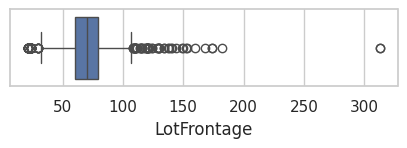

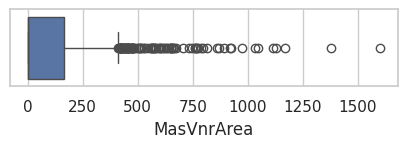

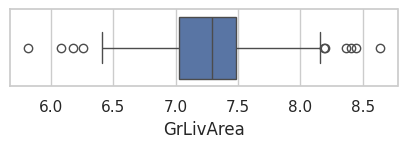

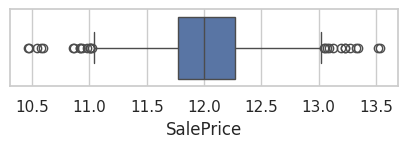

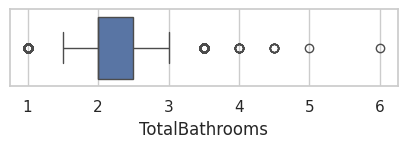

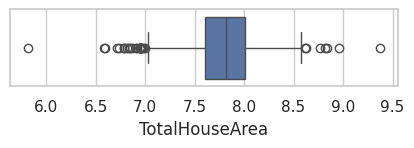

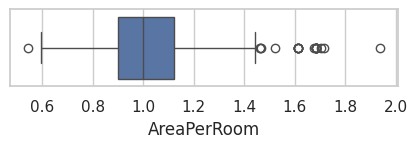


..........................................
Outliers in 'LotFrontage':
Number of outliers in 'LotFrontage': 106

..........................................
Outliers in 'MasVnrArea':
Number of outliers in 'MasVnrArea': 98

..........................................
Outliers in 'GrLivArea':
Number of outliers in 'GrLivArea': 10

..........................................
Outliers in 'SalePrice':
Number of outliers in 'SalePrice': 28

..........................................
Outliers in 'TotalBathrooms':
Number of outliers in 'TotalBathrooms': 394

..........................................
Outliers in 'TotalHouseArea':
Number of outliers in 'TotalHouseArea': 31

..........................................
Outliers in 'AreaPerRoom':
Number of outliers in 'AreaPerRoom': 22


In [139]:
#visualizing outliers
for column in df.columns:
    if df[column].dtype in ['float64']:
        plt.figure(figsize=(5, 1))
        sns.boxplot(x=df[column])
        plt.show()


#coloumns with outliers
for column in df.columns:
    if df[column].dtype in ['float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        print("\n..........................................")

        if len(outliers) > 0:
            print(f"Outliers in '{column}':")
            print(f"Number of outliers in '{column}': {len(outliers)}")



cols after outliers are removed:



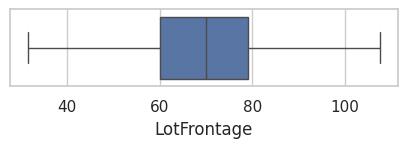

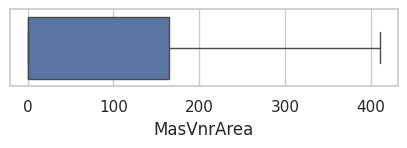

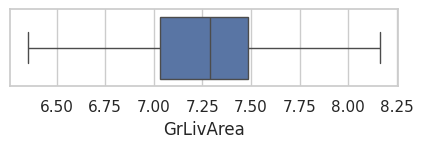

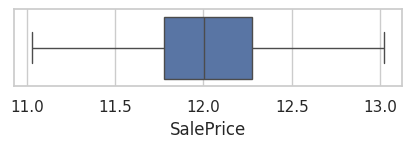

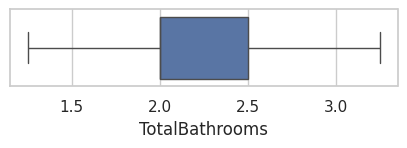

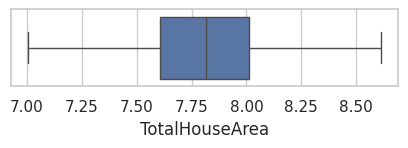

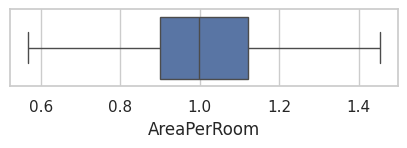

In [140]:
#capping the cols containig outliers since these cols are essential for our dataset
for column in df.columns:
    if df[column].dtype == 'float64':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


#visualizing outliers after fixing outliers
print("cols after outliers are removed:\n")
for column in df.columns:
    if df[column].dtype in ['float64']:
        plt.figure(figsize=(5, 1))
        sns.boxplot(x=df[column])
        plt.show()


****Exploratory Data Analysis****

***BoxPlot of top 20 variables depeing on sales price***

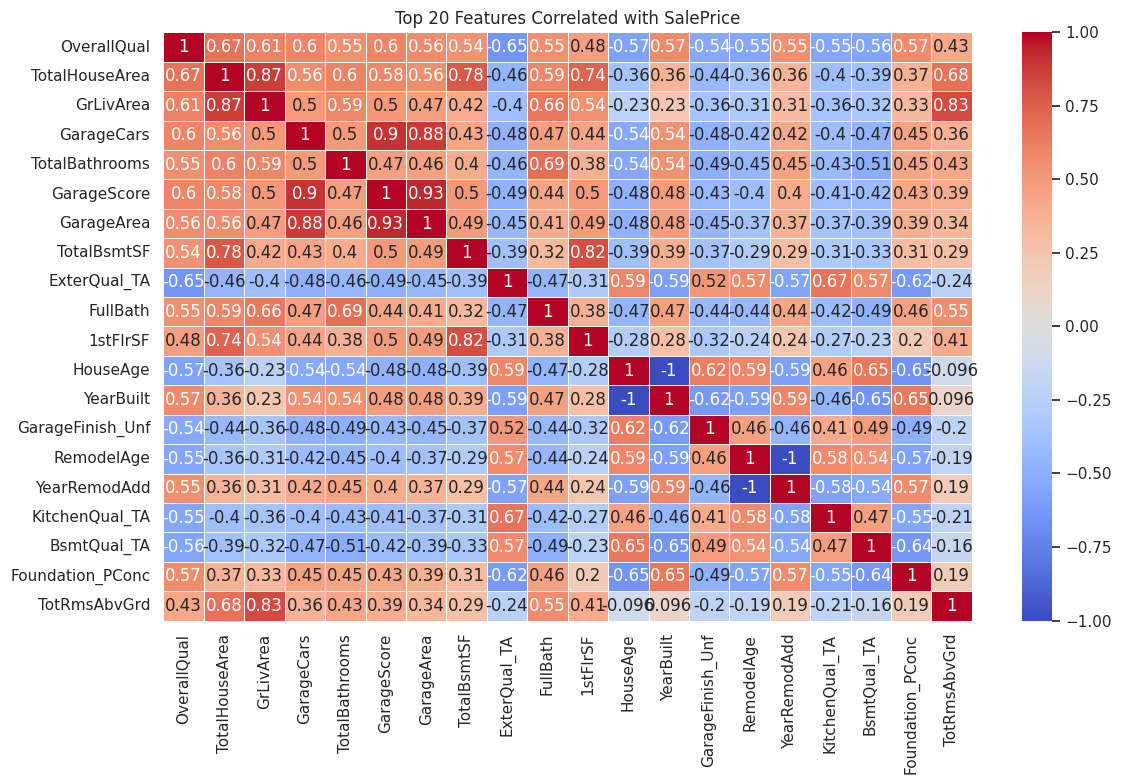

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ccorrelation matrix
corr = df.corr()

# Sort  most correlated with SalePrice
top_corr = corr['SalePrice'].abs().sort_values(ascending=False)

# selecting top 20 only
top_features = top_corr[1:21].index  # skipping index 0 (SalePrice)


top_corr_matrix = df[top_features].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Top 20 Features Correlated with SalePrice")
plt.tight_layout()
plt.show()


*Mutual Information Graph*

/tmp/ipython-input-142-2477893695.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi.head(20), y=mi.head(20).index, palette='viridis')




if Score >  0.5 Feature is very informative, 
if between 0.2-0.5 little informative,
if less than 0.1 has little to no contribution


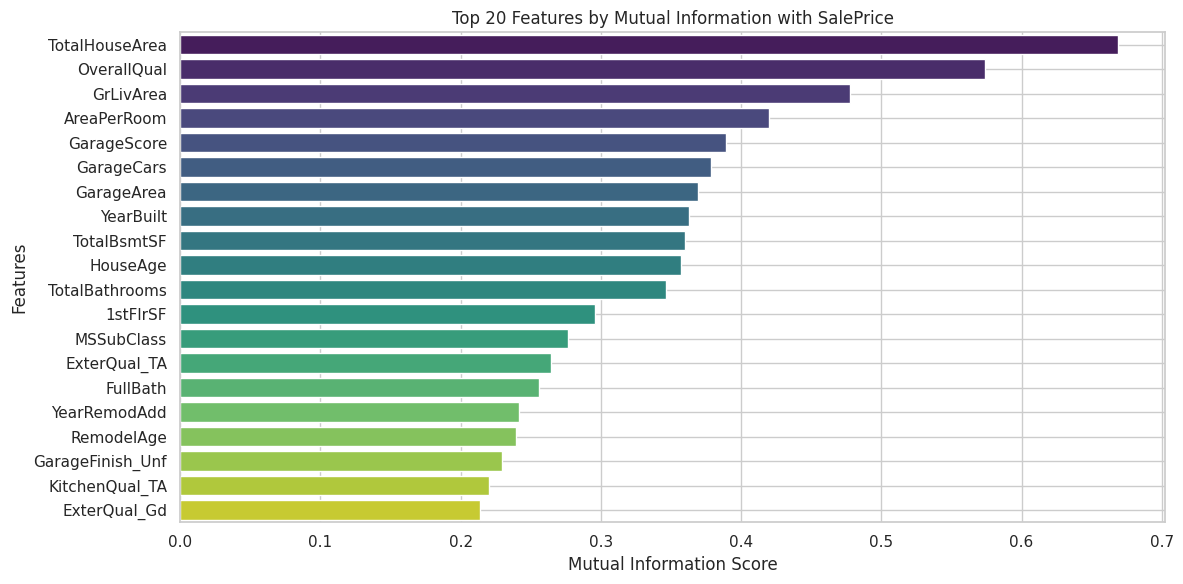

In [142]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

#  MI scores
mi = mutual_info_regression(X, y, discrete_features='auto')
mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)

#  Plotting graph for  top 20 features
plt.figure(figsize=(12, 6))
sns.barplot(x=mi.head(20), y=mi.head(20).index, palette='viridis')
plt.title("Top 20 Features by Mutual Information with SalePrice")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
print("\n\nif Score >  0.5 Feature is very informative, \nif between 0.2-0.5 little informative,\nif less than 0.1 has little to no contribution")
plt.show()


In [143]:
cor= df.corr(numeric_only=True)['SalePrice'].drop('SalePrice').sort_values(ascending=False)
print(cor)


OverallQual         0.818468
TotalHouseArea      0.816904
GrLivArea           0.732229
GarageCars          0.683778
TotalBathrooms      0.680750
                      ...   
KitchenQual_TA     -0.547957
RemodelAge         -0.570863
GarageFinish_Unf   -0.582450
HouseAge           -0.593104
ExterQual_TA       -0.607382
Name: SalePrice, Length: 234, dtype: float64


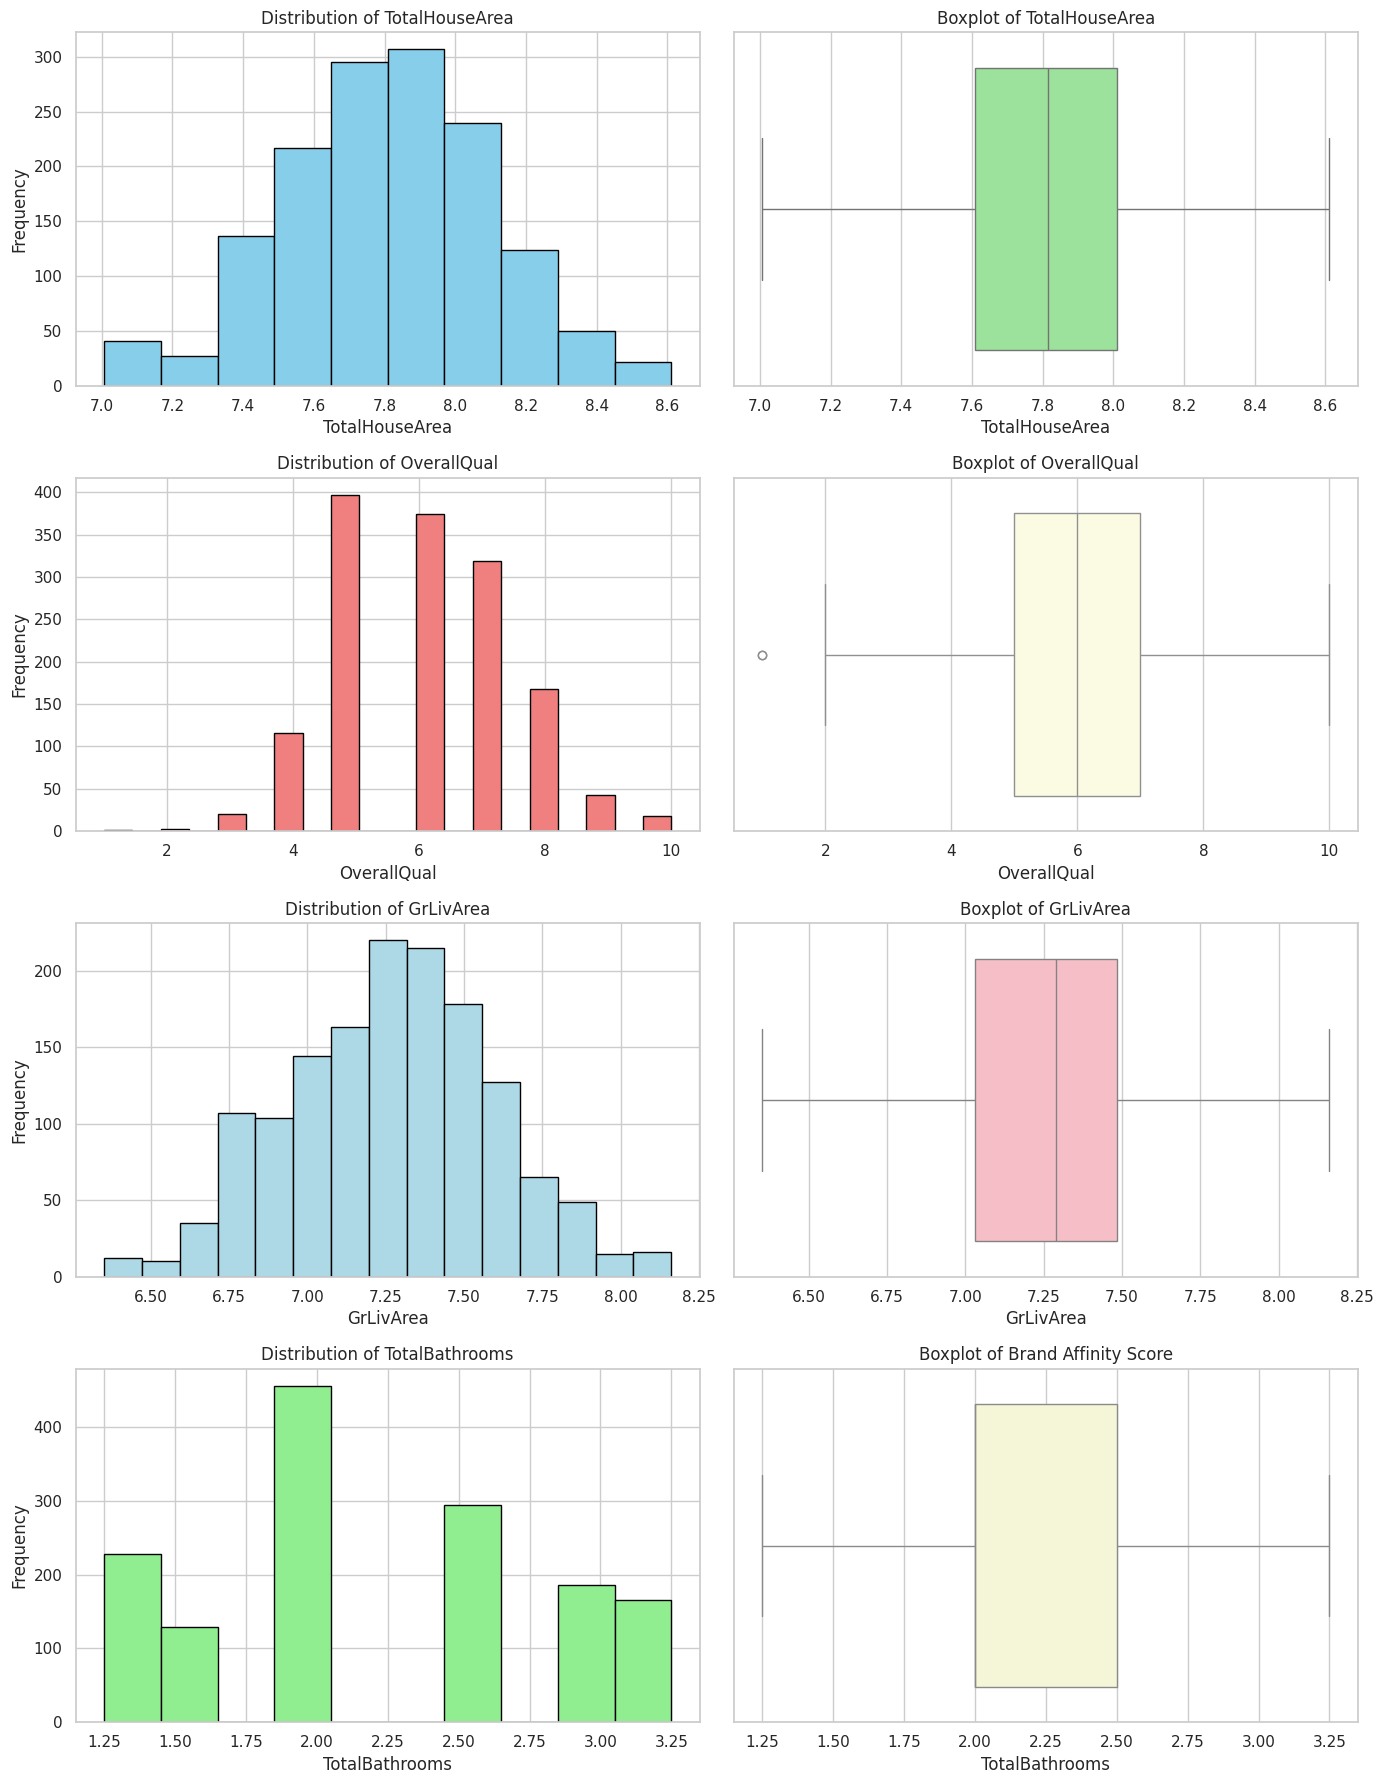

In [144]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(14, 18))

# 1.TotalHouseArea and Boxplot
axes[0, 0].hist(df['TotalHouseArea'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of TotalHouseArea')
axes[0, 0].set_xlabel('TotalHouseArea')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=df['TotalHouseArea'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Boxplot of TotalHouseArea')
axes[0, 1].set_xlabel('TotalHouseArea')


# 2. OverallQual Distribution and Boxplot
axes[1, 0].hist(df['OverallQual'], bins=20, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of OverallQual')
axes[1, 0].set_xlabel('OverallQual')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(x=df['OverallQual'], ax=axes[1, 1], color='lightyellow')
axes[1, 1].set_title('Boxplot of OverallQual')
axes[1, 1].set_xlabel('OverallQual')




# 3. GrLivArea Distribution and Boxplot
axes[2, 0].hist(df['GrLivArea'], bins=15, color='lightblue', edgecolor='black')
axes[2, 0].set_title('Distribution of GrLivArea')
axes[2, 0].set_xlabel('GrLivArea')
axes[2, 0].set_ylabel('Frequency')

sns.boxplot(x=df['GrLivArea'], ax=axes[2, 1], color='lightpink')
axes[2, 1].set_title('Boxplot of GrLivArea')
axes[2, 1].set_xlabel('GrLivArea')



# 4. Brand Affinity Score Distribution and Boxplot
axes[3, 0].hist(df['TotalBathrooms'], bins=10, color='lightgreen', edgecolor='black')
axes[3, 0].set_title('Distribution of TotalBathrooms')
axes[3, 0].set_xlabel('TotalBathrooms')
axes[3, 0].set_ylabel('Frequency')

sns.boxplot(x=df['TotalBathrooms'], ax=axes[3, 1], color='lightgoldenrodyellow')
axes[3, 1].set_title('Boxplot of Brand Affinity Score')
axes[3, 1].set_xlabel('TotalBathrooms')

plt.tight_layout()
plt.show()

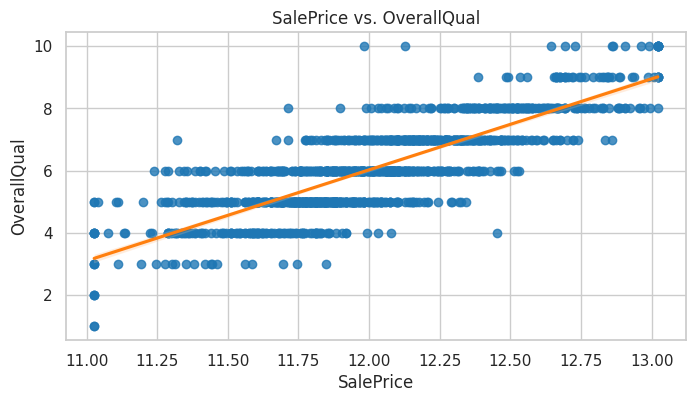

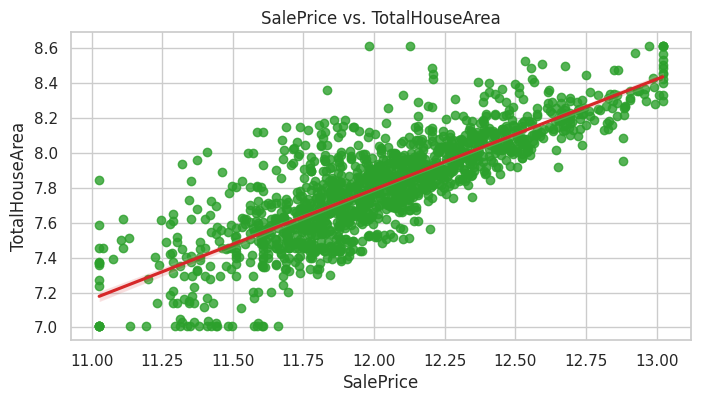

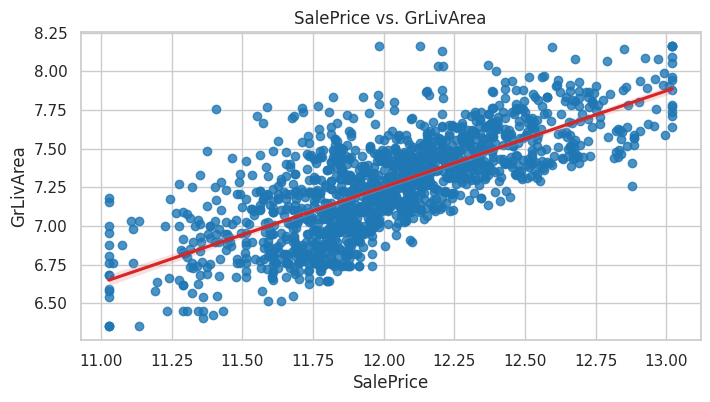

In [145]:
# Scatterplot with regression line:
plt.figure(figsize=(8, 4))
sns.regplot(x='SalePrice', y='OverallQual', data=df, scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#ff7f0e'})
plt.title('SalePrice vs. OverallQual')
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot(x='SalePrice', y='TotalHouseArea', data=df, scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#d62728'})
plt.title('SalePrice vs. TotalHouseArea')
plt.xlabel('SalePrice')
plt.ylabel('TotalHouseArea')
plt.show()



plt.figure(figsize=(8, 4))
sns.regplot(x='SalePrice', y='GrLivArea', data=df, scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#d62728'})
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.show()

**Temporal Analysis**

/tmp/ipython-input-146-2903320215.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Sale_Date'] = pd.to_datetime(dict(year=df['YrSold'], month=df['MoSold'], day=1))
/tmp/ipython-input-146-2903320215.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Purchase_Frequency_Per_Month'] = 1  # each row is 1 house sold
/tmp/ipython-input-146-2903320215.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Sale_Date')['Purchase_Frequency

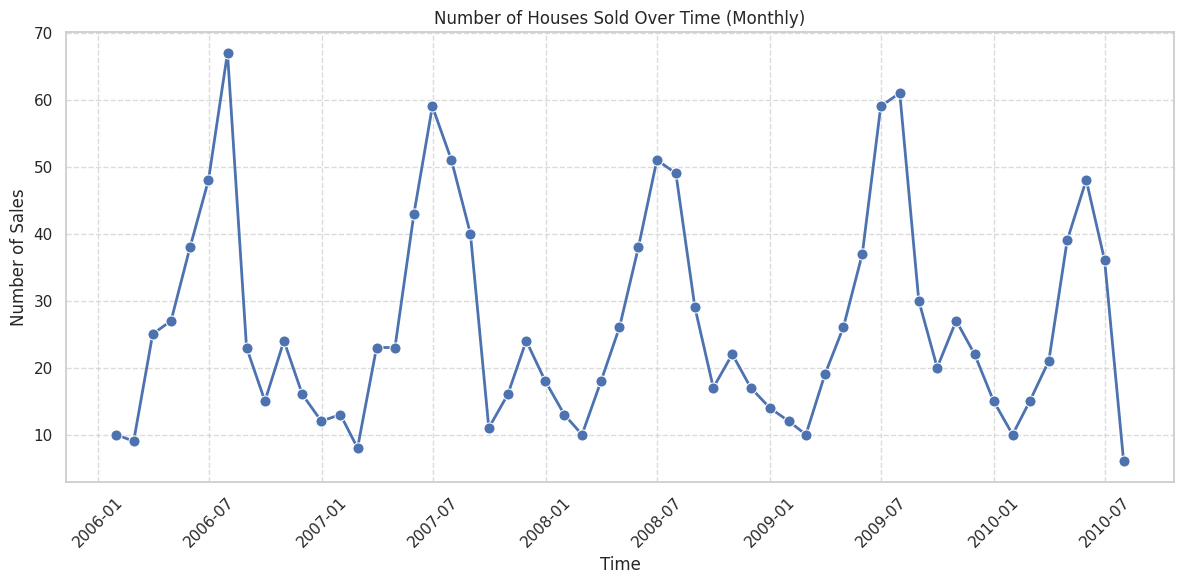

In [146]:

import matplotlib.pyplot as plt
import seaborn as sns

# date time col
df['Sale_Date'] = pd.to_datetime(dict(year=df['YrSold'], month=df['MoSold'], day=1))

df['Purchase_Frequency_Per_Month'] = 1  # each row is 1 house sold

# 3. Resample by month and calculate how many homes were sold
monthly_sales = df.resample('M', on='Sale_Date')['Purchase_Frequency_Per_Month'].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='b', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Number of Houses Sold Over Time (Monthly)')
plt.xlabel('Time')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [147]:
target = 'SalePrice'
predictors = [
    'OverallQual',
    'TotalHouseArea',
    'GrLivArea',
    'GarageCars',
    'TotalBathrooms',
    'KitchenQual_TA',
    'RemodelAge',
    'GarageFinish_Unf',
    'HouseAge',
    'ExterQual_TA'

]


In [148]:
# features and target variable
X = df[predictors]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*choosing max_depth for the tree*

> Add blockquote




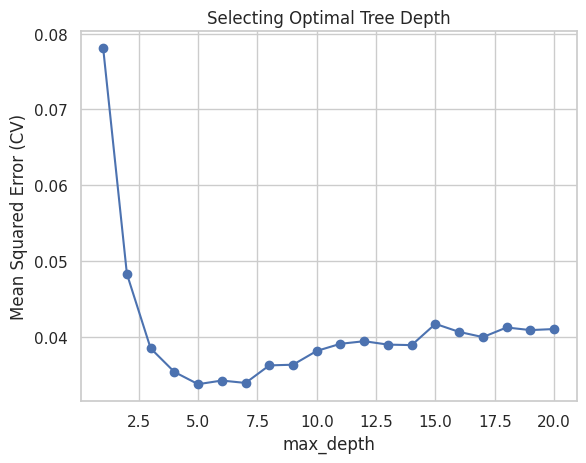

In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


depths = range(1, 21)
mse_scores = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(-scores.mean())


plt.plot(depths, mse_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (CV)')
plt.title('Selecting Optimal Tree Depth')
plt.grid(True)
plt.show()


from plot of MSE vs. max_depth
MSE sharply drops from depth 1 to 5 Lowest point is around depth = 5
After that, the MSE starts to rise slightly  meaning overfitting begins
so we choose max_depth =5 for our tree

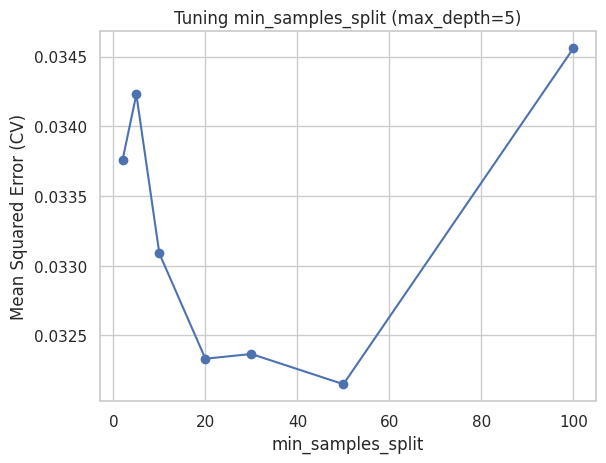

In [150]:
from sklearn.model_selection import cross_val_score
import numpy as np

min_splits = [2, 5, 10, 20, 30, 50, 100]
mse_scores_split = []

for min_split in min_splits:
    model = DecisionTreeRegressor(max_depth=5, min_samples_split=min_split, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores_split.append(-scores.mean())


plt.plot(min_splits, mse_scores_split, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error')
plt.title('Tuning min_samples_split')
plt.grid(True)
plt.show()


as from the graph we sww that min_samples_split=50

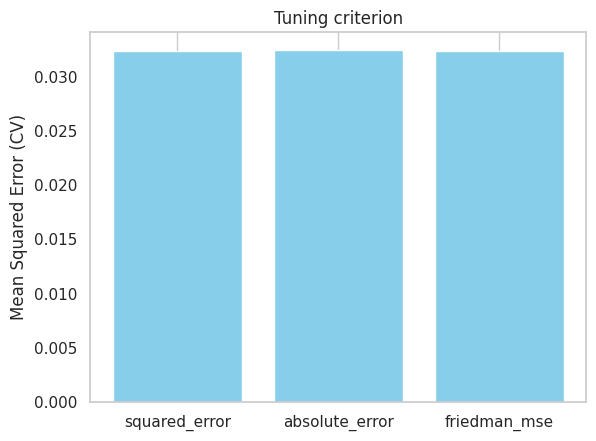

In [151]:
criteria = ['squared_error', 'absolute_error', 'friedman_mse']
mse_scores_crit = []

for crit in criteria:
    model = DecisionTreeRegressor(max_depth=5, min_samples_split=20, criterion=crit, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores_crit.append(-scores.mean())


plt.bar(criteria, mse_scores_crit, color='skyblue')
plt.ylabel('Mean Squared Error (CV)')
plt.title('Tuning criterion')
plt.grid(axis='y')
plt.show()
#since all are same we will be using sq error

In [152]:

model = DecisionTreeRegressor(max_depth=5, min_samples_split=50,criterion='squared_error', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [153]:
print("coeffitient of determination(R^2):")
model.score(X_test, y_test)


coeffitient of determination(R^2):


0.8091015865979533

In [154]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

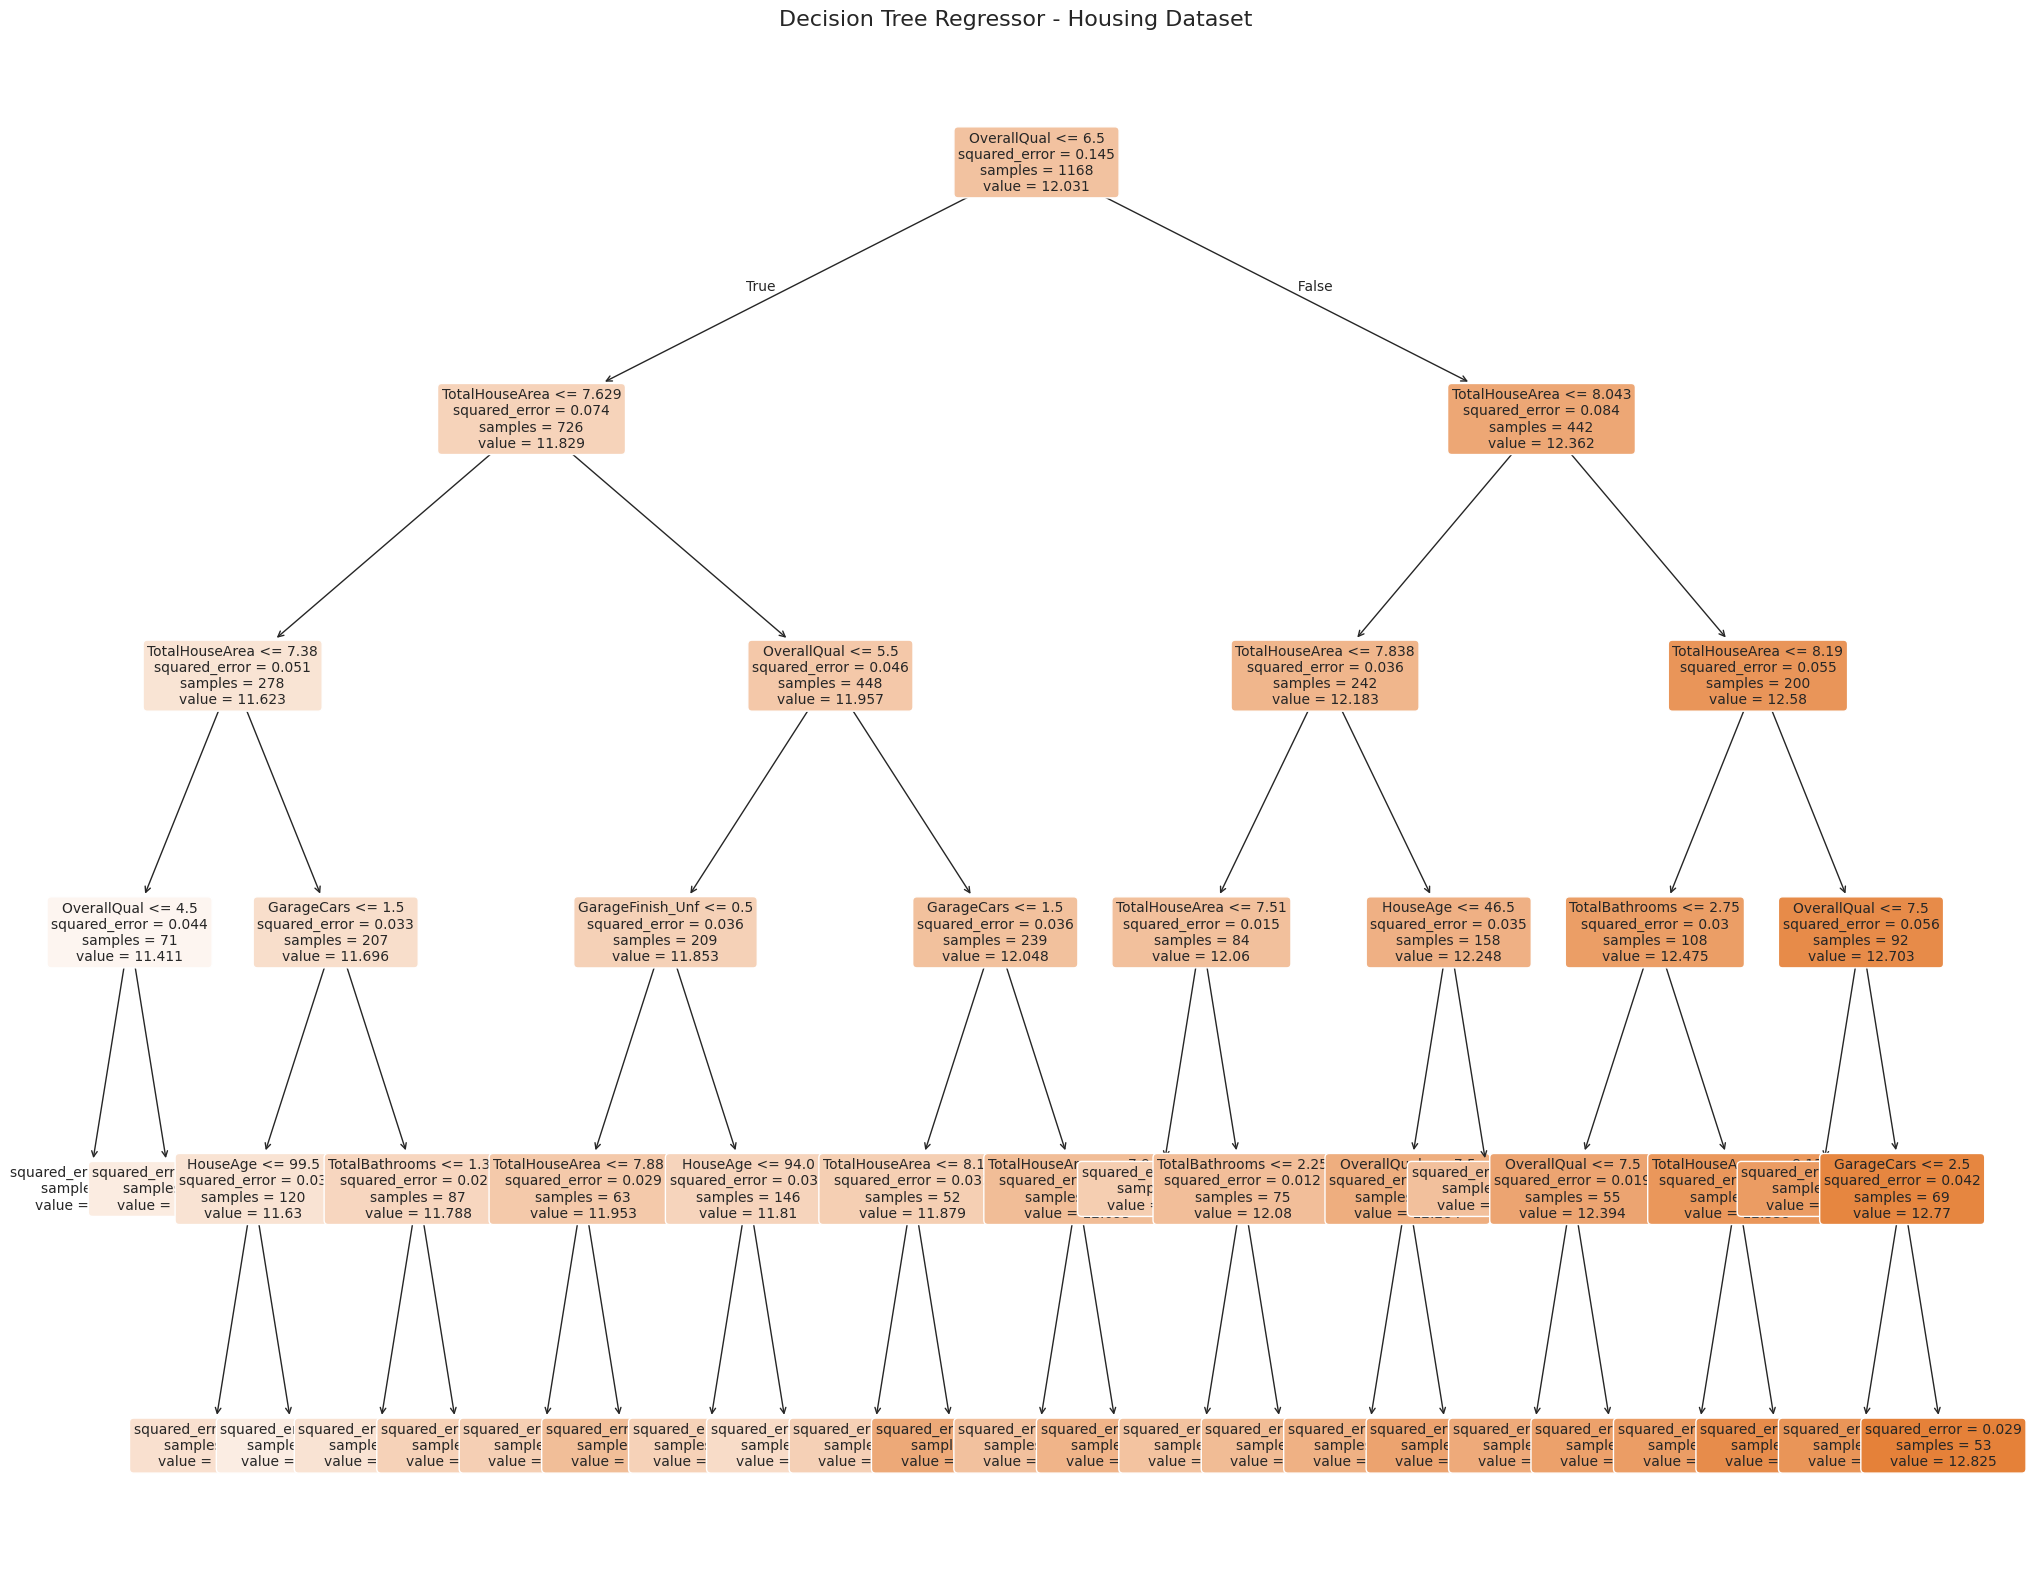

In [155]:
plt.figure(figsize=(25, 20))
plot_tree(
    model,
    filled=True,
    feature_names=predictors,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Regressor - Housing Dataset", fontsize=16)
plt.show()


In [156]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


MAE:  0.13
MSE:  0.03
RMSE: 0.18
R²:   0.8091
